In [ ]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.kernel_ridge import KernelRidge
from sklearn.preprocessing import MinMaxScaler

file_path = "data/UNSW-NB15.csv"
# Define the column names

column_names = [
    'srcip', 'sport', 'dstip', 'dsport', 'proto', 'state', 'dur', 
    'sbytes', 'dbytes', 'sttl', 'dttl', 'sloss', 'dloss', 'service', 
    'Sload', 'Dload', 'Spkts', 'Dpkts', 'swin', 'dwin', 'stcpb', 'dtcpb', 
    'smeansz', 'dmeansz', 'trans_depth', 'res_bdy_len', 'Sjit', 'Djit', 
    'Stime', 'Ltime', 'Sintpkt', 'Dintpkt', 'tcprtt', 'synack', 'ackdat', 
    'is_sm_ips_ports', 'ct_state_ttl', 'ct_flw_http_mthd', 'is_ftp_login', 
    'ct_ftp_cmd', 'ct_srv_src', 'ct_srv_dst', 'ct_dst_ltm', 'ct_src_ ltm', 
    'ct_src_dport_ltm', 'ct_dst_sport_ltm', 'ct_dst_src_ltm', 'attack_cat', 
    'Label'
]

df = pd.read_csv(file_path, header=None, names=column_names)

training_df = df.iloc

X = training_df.iloc[:, :-1].select_dtypes(include=[np.number])  # Select numeric columns for features
y = training_df['Label']  # Target column

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

scaler = MinMaxScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


/var/folders/sq/rgk61rf55wbc4kpxj9xdqvfw0000gn/T/ipykernel_94491/3128763620.py:23: DtypeWarning: Columns (1,3,47) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path, header=None, names=column_names)


In [ ]:
model = KernelRidge(kernel='polynomial', alpha=1.0, gamma=0.1)  # Gaussian RBF kernel
model.fit(X_train, y_train)

Accuracy: 0.44766666666666666
              precision    recall  f1-score   support

           0       1.00      0.41      0.58      2802
           1       0.11      1.00      0.19       198

    accuracy                           0.45      3000
   macro avg       0.55      0.70      0.39      3000
weighted avg       0.94      0.45      0.55      3000



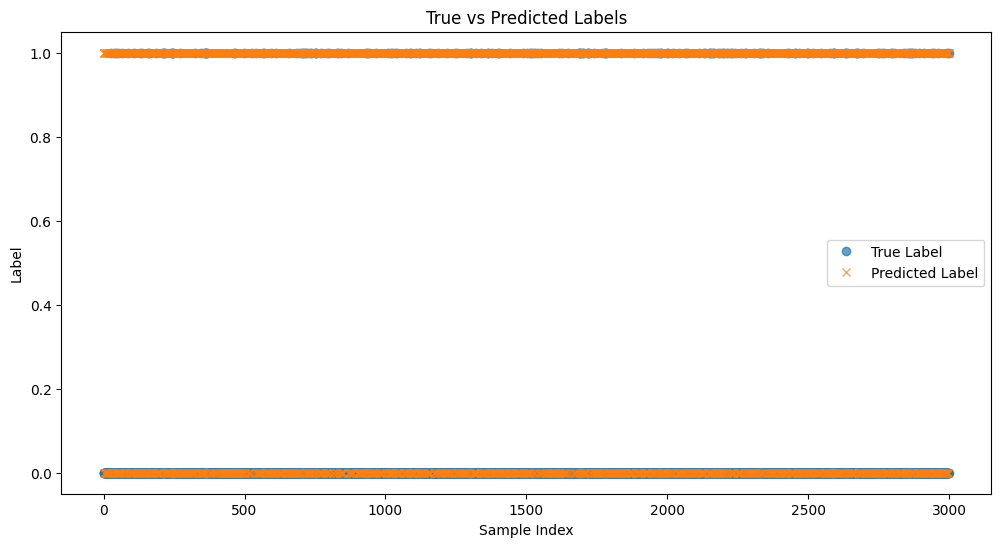

In [13]:
# Predict and evaluate
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt

y_pred = model.predict(X_test)
y_pred_binary = (y_pred >= 0).astype(int)  # Converts to 1 if >= threshold, otherwise 0

accuracy = accuracy_score(y_test, y_pred_binary)
print(f"Accuracy: {accuracy}")
print(classification_report(y_test, y_pred_binary))


comparison_df = pd.DataFrame({'True Label': y_test, 'Predicted Label': y_pred_binary})
comparison_df.reset_index(drop=True, inplace=True)

# Plot true vs predicted labels
plt.figure(figsize=(12, 6))
plt.plot(comparison_df.index, comparison_df['True Label'], 'o', label='True Label', alpha=0.7)
plt.plot(comparison_df.index, comparison_df['Predicted Label'], 'x', label='Predicted Label', alpha=0.7)
plt.legend()
plt.title("True vs Predicted Labels")
plt.xlabel("Sample Index")
plt.ylabel("Label")
plt.show()